## Question 1

### Bank Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
bank=pd.read_csv('C:/Users/Administrator/Desktop/Machine learning/with karthirmani/datasets/bank-full.csv',sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_dummies=pd.get_dummies(bank.drop('y',axis=1))
bank_dummies['y']=bank['y']
bank_dummies.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,no
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,no
2,33,2,5,76,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,no
3,47,1506,5,92,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,no
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,no


In [5]:
train, test=train_test_split(bank_dummies,test_size=0.3,random_state=100)

train_x=train.drop('y',axis=1)
train_y=train['y']
test_x=test.drop('y',axis=1)
test_y=test['y']

In [6]:
columns=['Decision Tree','Random Forest','AdaBoost','KNN']
index=['True Positive','True Negative','False Positive','False Negative','Accuracy','Sensitivity','Specificity']
df_bank_info=pd.DataFrame(columns=columns,index=index)
df_bank_info

,Decision Tree,Random Forest,AdaBoost,KNN
True Positive,NaN,NaN,NaN,NaN
True Negative,NaN,NaN,NaN,NaN
False Positive,NaN,NaN,NaN,NaN
False Negative,NaN,NaN,NaN,NaN
Accuracy,NaN,NaN,NaN,NaN
Sensitivity,NaN,NaN,NaN,NaN
Specificity,NaN,NaN,NaN,NaN


In [7]:
model_dt=DecisionTreeClassifier()
model_dt.fit(train_x,train_y)
pred1=model_dt.predict(test_x)
#print(classification_report(test_y,pred1))
print(confusion_matrix(test_y,pred1))

[[11133   852]
 [  806   773]]


In [8]:
TN,FP,FN,TP=confusion_matrix(test_y,pred1).ravel()
accuracy=(TP+TN)/(TP+TN+FP+FN)*100
senstivity=TP/(TP+FN)
specificity=TN/(TN+FP)
dt=np.array([TP,TN,FP,FN,accuracy,senstivity,specificity])
for i in range(df_bank_info.shape[0]):
    df_bank_info['Decision Tree'].iloc[i]=dt[i]

In [9]:
model_rf=RandomForestClassifier()
model_rf.fit(train_x,train_y)
pred2=model_rf.predict(test_x)
#print(classification_report(test_y,pred2))
print(confusion_matrix(test_y,pred2))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[11637   348]
 [ 1023   556]]


In [10]:
TN,FP,FN,TP=confusion_matrix(test_y,pred2).ravel()
accuracy=(TP+TN)/(TP+TN+FP+FN)*100
senstivity=TP/(TP+FN)
specificity=TN/(TN+FP)
dt=np.array([TP,TN,FP,FN,accuracy,senstivity,specificity])
for i in range(df_bank_info.shape[0]):
    df_bank_info['Random Forest'].iloc[i]=dt[i]

In [11]:
model_knn=KNeighborsClassifier()
model_knn.fit(train_x,train_y)
pred3=model_knn.predict(test_x)
#print(classification_report(test_y,pred3))
print(confusion_matrix(test_y,pred3))

[[11510   475]
 [ 1145   434]]


In [12]:
TN,FP,FN,TP=confusion_matrix(test_y,pred3).ravel()
accuracy=(TP+TN)/(TP+TN+FP+FN)*100
senstivity=TP/(TP+FN)
specificity=TN/(TN+FP)
dt=np.array([TP,TN,FP,FN,accuracy,senstivity,specificity])
for i in range(df_bank_info.shape[0]):
    df_bank_info['KNN'].iloc[i]=dt[i]

In [13]:
model_ab=AdaBoostClassifier()
model_ab.fit(train_x,train_y)
pred4=model_ab.predict(test_x)
#print(classification_report(test_y,pred4))
print(confusion_matrix(test_y,pred4))

[[11585   400]
 [  994   585]]


In [14]:
TN,FP,FN,TP=confusion_matrix(test_y,pred4).ravel()
accuracy=(TP+TN)/(TP+TN+FP+FN)*100
senstivity=TP/(TP+FN)
specificity=TN/(TN+FP)
dt=np.array([TP,TN,FP,FN,accuracy,senstivity,specificity])
for i in range(df_bank_info.shape[0]):
    df_bank_info['AdaBoost'].iloc[i]=dt[i]
df_bank_info

,Decision Tree,Random Forest,AdaBoost,KNN
True Positive,773,556,585,434
True Negative,11133,11637,11585,11510
False Positive,852,348,400,475
False Negative,806,1023,994,1145
Accuracy,87.7765,89.8924,89.7228,88.0566
Sensitivity,0.48955,0.352122,0.370488,0.274858
Specificity,0.928911,0.970964,0.966625,0.960367


## Question 2

### IRIS DATASET

In [15]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [16]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
train,test=train_test_split(iris,test_size=0.3,random_state=100)
train_x=train.drop('species',axis=1)
train_y=train['species']
test_x=test.drop('species',axis=1)
test_y=test['species']

In [18]:
from sklearn.metrics.pairwise import euclidean_distances

In [19]:
distances=pd.Series(euclidean_distances(test_x.head(1),train_x).flatten())
print(distances)
distances.index=train_x.index
distances=distances.sort_values()

0      4.947727
1      4.648656
2      4.711688
3      1.941649
4      4.811445
5      4.439595
6      5.008992
7      1.170470
8      1.974842
9      0.842615
10     1.615549
11     0.374166
12     1.760682
13     1.977372
14     0.655744
15     2.017424
16     5.352569
17     0.616441
18     0.591608
19     0.787401
20     4.901020
21     5.124451
22     0.812404
23     4.506662
24     4.837355
25     4.549725
26     1.090871
27     0.316228
28     0.714143
29     0.787401
         ...   
75     1.452584
76     4.964877
77     4.843552
78     4.768648
79     0.469042
80     2.197726
81     1.272792
82     4.883646
83     0.761577
84     0.556776
85     1.135782
86     1.161895
87     2.951271
88     1.300000
89     2.867054
90     1.183216
91     0.692820
92     4.770744
93     4.976947
94     1.500000
95     2.063977
96     3.088689
97     1.802776
98     0.964365
99     2.479919
100    1.529706
101    0.331662
102    1.957039
103    4.496665
104    5.025933
Length: 105, dtype: floa

In [20]:
neighbours=distances[0:5].index

In [21]:
train_y[neighbours].value_counts()

virginica    5
Name: species, dtype: int64

## Question 3

### Kaggle 

### score image

In [22]:
from IPython.display import Image

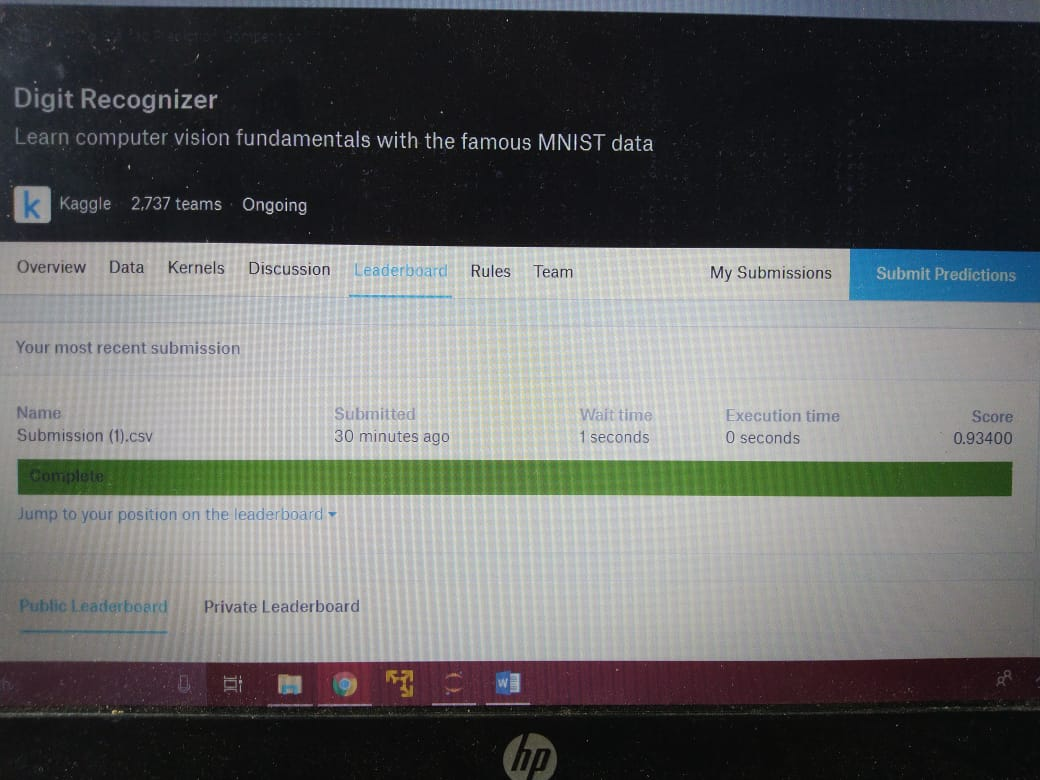

In [23]:
Image(filename='C:/Users/Administrator/Downloads/img.jpeg',width=500,height=500)

to have a clearer picture of the image, open in new tab.

### URL

https://www.kaggle.com/marveljacob/kernel196f779bd5